# Exemplo de Diferenciação via Diferenças Finitas

Considere a função $f(x)=e^{\cos{5x}}x^2$, cuja qual é contínua em $\mathbb{R}$.

In [2]:
from numpy import cos,sin,exp,power
f = lambda x: exp(cos(10*x))*power(x,2)
f_ = lambda x: x*(10*x*sin(10*x)-2)*(-exp(cos(10*x)))

Vamos aplicar as diferenças progressivas, regressivas e centradas:

In [3]:
progressivas = lambda f, x, h: (f(x+h)-f(x))/h
regressivas = lambda f, x, h: (f(x)-f(x-h))/h
centradas = lambda f, x, h: (f(x+h)-f(x-h))/(2*h)

O intervalo considerado será $[1, 5]$, e os tamanhos de $h$ serão $1e-1$, $1e-2$, $1e-3$ e $1e-4$.

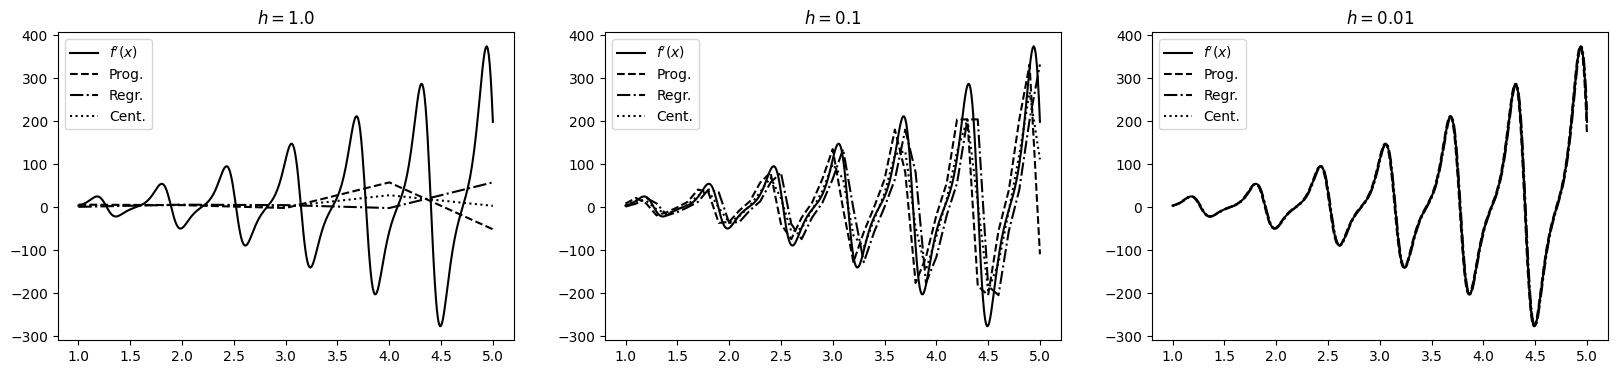

In [7]:
import matplotlib.pyplot as plt
from numpy import arange

fig, ax = plt.subplots(1,3,figsize=(20,4))
f_eixo = f_(arange(1,5+.01,.01))
for i,h in enumerate([1e0,1e-1,1e-2]):
  x = arange(1,5+h,h)
  ax[i].set_title(f"$h={h}$")
  ax[i].plot(arange(1,5+.01,.01), f_eixo, label="$f'(x)$", c="black")
  ax[i].plot(x, progressivas(f, x, h), label="Prog.", c="black", linestyle="--")
  ax[i].plot(x, regressivas(f, x, h), label="Regr.", c="black", linestyle="-.")
  ax[i].plot(x, centradas(f, x, h), label="Cent.", c="black", linestyle=":")
  ax[i].legend()
plt.plot()
plt.show()

Podemos observar as diferenças numéricas também:

In [18]:
from numpy import absolute
from tabulate import tabulate 
tabela = []

for h in [1e0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]:
  x = arange(1,5+h,h)
  lista_prog = absolute(f_(x) - progressivas(f,x,h)).tolist()
  lista_regr = absolute(f_(x) - regressivas(f,x,h)).tolist() 
  lista_cent = absolute(f_(x) - centradas(f,x,h)).tolist() 

  media_prog = sum(lista_prog)/len(lista_prog)
  media_regr = sum(lista_regr)/len(lista_regr)
  media_cent = sum(lista_cent)/len(lista_cent)

  tabela.append([str(h),media_prog,media_regr,media_cent])

print(tabulate(tabela, headers=["h", "Prog.", "Regr.", "Cent."]))

     h         Prog.         Regr.         Cent.
------  ------------  ------------  ------------
1       106.686       71.8686       88.8037
0.1      48.8974      44.5942       19.5889
0.01      4.74169      4.69337       0.241901
0.001     0.470544     0.470057      0.00241809
0.0001    0.0469497    0.0469449     2.41495e-05
1e-05     0.00469453   0.00469449    2.41971e-07
1e-06     0.00046945   0.000469449   1.30737e-08
